In [4]:
using ProgressMeter , FFTW , Plots

## Definimos funciones necesarias

In [5]:
# Runge-Kutta de 4to orden clásico
function rk4(dydt , y , t , dt) 
    #
    k1 = dt .* dydt(y,t)
    k2 = dt .* dydt(y .+ k1./2 , t + dt/2)
    k3 = dt .* dydt(y .+ k2./2 , t + dt/2)
    k4 = dt .* dydt(y .+ k3 , t + dt)
    #
    return @. y + (k1 + 2k2 + 2k3 + k4)/6
end
  
#Runge-Kutta de 4to orden y 10 pasos
function rk4_10(dydt, y , t , dt)
    u1 = copy(y)
    u2 = copy(y)
    for i in 1:5
        F = dydt(u1,t)
        u1 = @. u1 + F*dt/6
    end
    u2 = @. (u2 + 9u1)/25
    u1 = @. 15u2 - 5u1
    for i in 6:9
        F = dydt(u1,t)
        u1 = @. u1 + F*dt/6
    end
    F = dydt(u1,t)
    u1 = @. u2 + 3u1/5 + F*dt/10
    
    return u1
end

function derivative(fx, x; order=1)
    Nx = length(x) #cantidad de nodos espaciales
    dx = x[2]-x[1] #paso 
    

    ik = im .* rfftfreq(Nx, 2pi/dx)

    return irfft(rfft(fx) .* ik.^order, Nx)
end

derivative (generic function with 1 method)

## Definimos ecuación a resolver

In [6]:
dudt(u,t) = -0.5.*derivative(u.^2 , x) + D.*derivative(u , x , order=2)

dudt (generic function with 1 method)

In [7]:
# Función integradora y graficadora para distintos valores de D ,N y dt.

function estabilidad(Nx,dt,D)
    
    #Discretizacion del espacio
    xmin , xmax = 0.0 , 2pi
    x = range(xmin, step=(xmax-xmin)/Nx , length=Nx)
    
    #Discretización temporal
    Tfin= 1.5
    Nt = round(Int, Tfin/dt) 
    
    #Condicion inicial
    u0 = sin.(x)
    
    #Ecuación diferencial
     dudt(u,t) = -0.5.*derivative(u.^2 , x) + D.*derivative(u , x , order=2)

    #Integrador númerico
    u = u0
    u1 = u0

    for i in 1:Nt

        u = rk4(dudt , u , Nt ,dt)
        u1 = rk4_10(dudt , u1 , Nt , dt)
    
    end
    
    #Graficar
    l = @layout [a  b ]

    P1 = plot()
    
    plot!(P1 ,x, u0 , label="Inicial")
    plot!(P1 ,x , u , label="RK4")
    
    P2 = plot()
    #plot!(P2 ,title="D = $D")
    plot!(P2 ,x, u0 , label="Inicial")
    plot!(P2 ,x , u1, label="RK4_10", color="green")
    
    
    P = plot(P1, P2,  layout = l)
    P[:plot_title] = "D= $D , Nx = $Nx , dt = $dt"
    plot(P)
end



estabilidad (generic function with 1 method)

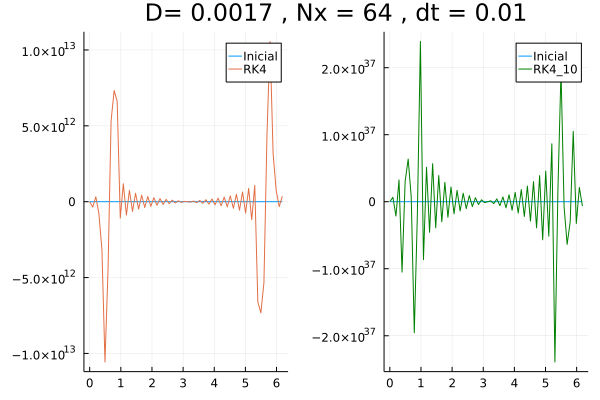

In [19]:
# Soluciones entregadas por cada método para los valores N , dt , D

estabilidad(64,0.01,0.0017)

In [20]:
#Guardar grafico

savefig("D-0-0017.pdf")

## Comportamiendo de las soluciones numericas para valores crecientes de dt o N

In [15]:
dt1 = collect(3:0.01:5); #valores de dt a graficar
N1 = collect(60:20:200); #valores de N a graficar
D = collect(0.001:0.0001:0.01); #Valores de D a graficar

instants_to_plot = 1:length(D) #reemplazar por N1 si se quiere analizar la resolución

progressbar = Progress(length(instants_to_plot) , desc="Animating...")
anim = @animate for i in instants_to_plot
    estabilidad(64,0.01 ,D[i]) #reemplazar por N1[i] si se quiere analizar la resolución
    next!(progressbar)
end

Animating... 100%|███████████████████████████████████████| Time: 0:00:25


Animation("/tmp/jl_eD2HIm", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000082.png", "000083.png", "000084.png", "000085.png", "000086.png", "000087.png", "000088.png", "000089.png", "000090.png", "000091.png"])

In [16]:
# Save animation as mp4
mp4(anim, "estabilidad.mp4" , fps = 5)

┌ Info: Saved animation to 
│   fn = /home/constanza/TAREAS/estabilidad.mp4
└ @ Plots /home/constanza/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/home/constanza/TAREAS/estabilidad.mp4")